<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/Blazars_2_poblaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACION DE BLAZARS
## Con scikit-learn


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
#files.upload()
# choose the file on your computer to upload it then
#import Snippet_188

In [0]:
pip install ipynb

### Cargamos las dependencias de módulos y librerías


In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
#pip install ipynb
!pwd
!ls "/content/drive/My Drive"



/content
'1 INTRODUCCIÓN.gdoc'			    etiquetas3FG_raw.xlsx
 AUC_1.png				    FERMI3FGL4Y_short.xls
 backup					    FERMI3FGL4Y.xls
 BCU_raw.xlsx				    Imagen1.png
' Blazars_2_poblaciones.ipynb'		    Imagen2.png
 BLZARS_FULL_POPULATION_raw.xlsx	    Imagen3.png
 Caracteristicas3FG_raw.xlsx		    Mitty
'Colab Notebooks'			    my_functions.ipynb
 df_p1_3FG_raw.xlsx			    poblacion_2.png
 df_p2_3FG_raw.xlsx			    tanteo-1.png
 Discriminantes_pappers.png		   'TFM-lay out.gdoc'
'Documento de eduardorodriguez rioja'	    Untitled0.ipynb
'Documento de eduardorodriguez rioja (1)'


## Carga de datos
### Cargamos los archivos correspondientes a las dos poblaciones segmentadas que contiene cada uno de ellos el conjunto conpleto de blazars 

In [0]:
#carasteristicas=gui_fname()
p1='/content/drive/My Drive/df_p1_3FG_raw.xlsx'
p2='/content/drive/My Drive/df_p2_3FG_raw.xlsx'


# Empezamos intentando clasificar la población 2 que es la más numerosa

In [0]:
pd.set_option("display.max_columns", 80) # ver el numero de columnas en este caso 73
#pd.read_csv('Filename.csv').fillna(1e6).astype(np.float32)

df = pd.read_excel(p2).fillna(1e6).astype(np.float32)
#eliminamos columnas que molestan
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
#y = pd.read_excel(etiquetas).fillna(1e6).astype(np.int32) 
#df_BCU = pd.read_excel(BCU).fillna(1e6).astype(np.float32)
#print(X.shape,y.shape)
#y
print (df.shape)
df.head(5)

(1590, 57)


,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,156.604996,-85.715202,9.074170e-10,2.01336,0.08438,13.433965,300.167297,-23.646200,2222.709961,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1.0,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.0,1.0,0.0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103792,0.038038,0.303921,0.491893,-1.419783,-9.042193
1,11.687500,-84.320000,2.772770e-10,2.82062,0.13341,6.239794,303.069885,-32.806999,395.730011,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1.0,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.0,0.0,0.0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086
2,330.610107,-83.655998,1.985760e-09,2.42962,0.06724,23.074068,307.943298,-31.734699,757.270020,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2.0,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.718750,2630000.0,0.0,0.0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343189,0.223498,0.385538,1.213337,-0.650727,-8.702073
3,83.410599,-83.384697,8.110600e-10,2.29598,0.07827,11.699274,295.786896,-29.149300,946.090027,1.196400e-12,1.248500e-13,9.813590e-12,1.027190e-12,0.809,1.0,2.2960,7.750010e-09,2.872050e-09,-2.839320e-09,1.809270e-12,2.754,3.472950e-09,5.669210e-10,-5.520220e-10,2.303550e-12,6.847,6.923790e-10,1.332310e-10,-1.250930e-10,1.616390e-12,6.802,1.004000e-10,6.659350e-13,4.141,5.346040e-11,8.475950e-13,5.404,144.790558,7.860495,1.053960e-07,1.943020e-08,54695.242188,2630000.0,0.0,0.0,-0.381099,-0.667551,-0.746714,0.079162,0.286452,2.975932,12.376029,0.069150,0.360968,1.092581,-1.160210,-9.090947
4,4.745400,-81.876900,6.529680e-10,2.07544,0.10204,10.650256,304.329803,-35.163101,2187.520020,1.392900e-13,1.858100e-14,7.255220e-12,9.692230e-13,0.310,1.0,2.0754,9.456800e-09,3.084540e-09,-2.976170e-09,2.255640e-12,3.206,1.945380e-09,5.028870e-10,-4.849710e-10,1.323820e-12,4.257,4.000200e-10,1.082130e-10,-1.006460e-10,9.541290e-13,4.752,1.268910e-10,8.634840e-13,5.924,7.248200e-11,1.251450e-12,6.454,85.652306,7.363566,4.243460e-08,1.054210e-08,55030.082031,2630000.0,1.0,0.0,-0.658771,-0.658890,-0.518359,-0.140531,0.000119,3.339952,8.042276,0.029107,0.317110,0.905379,-1.535998,-9.185108


# separamos en dos dataframes :

1.   df_Ent , compuesto por los BLL y FSRQ
2.   df_UNK ,  compuesto por blazars a predecir



In [0]:
#sns.pairplot(X)
#y.reset_index(drop=True , inplace = True)
#y.drop(['Unnamed: 0'], axis=1)
#y.drop(['Unnamed: 0'], axis=1, inplace=True)
#y_ = y['source_type']
#type(y_)
#y_
df['source_type'].apply(pd.Series).stack().value_counts()

1.0    626
2.0    563
0.0    401
dtype: int64

In [0]:
clase='source_type'
df_bl = df.loc[ (df[clase]== 1)  | (df[clase]== 0)]
df_UNK = df.loc[ (df[clase]== 2)   ]
df_UNK['source_type'].apply(pd.Series).stack().value_counts()
#y_.shape
#y.info()

2.0    563
dtype: int64

In [0]:
df_UNK.head(5)

,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
1027,85.560303,-87.618500,4.170300e-10,2.03895,0.14339,6.431914,300.360992,-27.813000,2499.959961,6.744600e-14,1.332100e-14,4.636140e-12,9.172090e-13,0.308,1.0,2.0389,5.856320e-09,2.706810e-09,-2.661290e-09,1.401870e-12,2.210,3.402460e-10,4.098260e-10,1.000000e+06,2.325300e-13,0.782,2.440210e-10,1.023570e-10,-9.301360e-11,5.841320e-13,2.924,1.601190e-10,1.094290e-12,5.529,2.434160e-11,4.264750e-13,3.656,50.015041,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,256.0,-0.890182,-0.164694,-0.207606,0.042913,-0.725489,3.397933,7.776074,0.047886,0.309407,0.890760,-1.319790,-9.379832
1028,317.163086,-86.317596,1.974810e-10,1.74000,0.26993,4.728537,306.415100,-29.160400,8678.959961,3.518900e-15,1.118300e-15,2.571730e-12,8.174750e-13,0.417,1.0,1.7400,1.034170e-09,2.552510e-09,1.000000e+06,2.550060e-13,0.438,4.628000e-10,4.352200e-10,-4.140330e-10,3.277170e-13,1.067,6.058490e-11,8.389500e-11,1.000000e+06,1.493900e-13,0.841,2.303760e-12,1.631330e-14,0.138,5.805490e-11,1.151920e-12,5.852,35.195969,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,4.0,-0.381684,-0.768488,-0.926735,0.158247,0.386804,3.938468,7.443311,0.088188,0.240549,0.871766,-1.054591,-9.704474
1029,186.165298,-83.209297,4.487580e-10,2.69452,0.10959,7.470914,302.089386,-20.381399,488.019989,5.254500e-12,6.981400e-13,8.609830e-12,1.159620e-12,1.103,1.0,2.6945,1.585340e-08,4.358800e-09,-4.375290e-09,3.564340e-12,3.692,3.458890e-09,6.843420e-10,-6.694150e-10,2.194040e-12,5.447,3.306700e-10,1.205140e-10,-1.117190e-10,7.434510e-13,3.296,7.640900e-11,4.846760e-13,3.325,3.678400e-12,5.084610e-14,0.469,56.541351,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,0.0,-0.641794,-0.825484,-0.624599,-0.200885,0.183690,2.688438,7.568197,0.147639,0.430481,0.878992,-0.830798,-9.347988
1030,344.541290,-82.805603,7.053620e-10,2.19382,0.11050,8.783147,307.012695,-33.402302,1878.079956,2.121000e-13,3.074500e-14,8.055360e-12,1.185090e-12,1.339,1.0,2.1938,2.145630e-09,5.739860e-09,1.000000e+06,5.058890e-13,0.329,1.988640e-09,6.748210e-10,-6.505440e-10,1.334690e-12,3.162,5.644010e-10,1.349750e-10,-1.231120e-10,1.330720e-12,5.472,1.857650e-10,1.246770e-12,6.455,2.528040e-11,4.166490e-13,3.273,54.801598,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,0.0,-0.037973,-0.557860,-0.504736,-0.053124,0.519887,3.273714,6.239404,0.152451,0.341201,0.795143,-0.816870,-9.151587
1031,226.141693,-82.709503,3.001340e-10,2.29785,0.16781,4.106724,307.208893,-20.970200,1438.089966,1.694100e-13,4.180000e-14,3.636390e-12,9.182700e-13,0.459,1.0,2.2979,1.112970e-08,3.201060e-09,-3.148340e-09,2.597810e-12,3.585,1.214770e-09,5.359770e-10,-5.216660e-10,8.055620e-13,2.391,2.399310e-10,1.127720e-10,-1.033030e-10,5.600270e-13,2.511,5.106580e-11,3.386380e-13,2.471,1.038210e-11,1.644900e-13,1.937,45.303288,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,8.0,-0.803188,-0.670130,-0.649028,-0.021102,-0.133058,3.157786,11.031491,0.111768,0.361322,1.042634,-0.951683,-9.522685


In [0]:
#X.where(np.isnan(X))
#X.drop('Unnamed: 0', axis=1, inplace=True) # borro la columna sin reasignar un nuevo dataframe



In [0]:
#df_BCU.drop('Unnamed: 0', axis=1, inplace=True) # borro la columna sin reasignar un nuevo dataframe
#df_BCU.drop('source_type', axis=1, inplace=True)
df_bl.columns
y_ = df_bl['source_type']
y_
df_bl.head(2)

,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,156.604996,-85.715202,9.074170e-10,2.01336,0.08438,13.433965,300.167297,-23.646200,2222.709961,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1.0,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1.0,0.0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103792,0.038038,0.303921,0.491893,-1.419783,-9.042193
1,11.687500,-84.320000,2.772770e-10,2.82062,0.13341,6.239794,303.069885,-32.806999,395.730011,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1.0,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,0.0,0.0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086


In [0]:
X=df_bl
X.drop(['source_type'], axis=1, inplace=True)


In [0]:
caracteristicas_=df_bl.columns
#X.head(3)
caracteristicas_

Index(['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
       'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
       'flux_density_error', 'energy_flux', 'energy_flux_error',
       'curve_significance', 'spectrum_type', 'powerlaw_index',
       'flux_100_300_mev', 'flux_100_300_mev_pos_err',
       'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
       'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
       'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
       'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
       'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
       'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
       'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
       'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
       'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope', 'soft_slope',
       'P_E_lg', 

(array([401., 626.]),
 array([0. , 0.5, 1. ], dtype=float32),
 <a list of 2 Patch objects>)

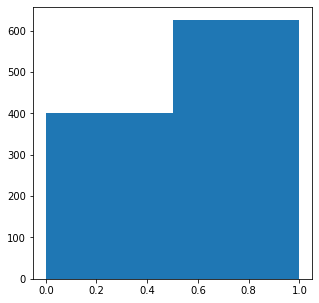

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(y_, bins=2)

In [0]:
1- 563/(563+626)

#y_

0.5264928511354079

### Normalización de los datos

In [0]:
from sklearn.model_selection import train_test_split
sc = StandardScaler()
sc.fit(X)
#sc.fit(y)
X_std = sc.transform(X)
#df_BCU_std=sc.transform(df_BCU)
#y_std= sc.transform(y)
y_.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: source_type, dtype: float32

### División de datos en dos conjuntos: X_train, y_train, conjunto de entrenamiento. X_test, y_test conjunto de test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.4)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# APLICACIÓN DE CLASIFICADORES

## Estudiamos los datos con un mapa de calor

In [0]:
#plt.figure(figsize=(35,30))
#cor = X.corr()
#g=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [0]:
#savefig("/content/drive/My Drive/poblacion_2.png")
#Correlation with output variable
#cor_target = abs(cor["spectral_index"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.85]
#relevant_features

## Con GradientBoostClassifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.11, max_depth=6,
     n_estimators=1000, subsample=0.4)

#y_train[0:4]

In [0]:
%%timeit
gbc.fit(X_train, y_train)

1 loop, best of 3: 2.47 s per loop


In [0]:
y_pred_test = gbc.predict(X_test)
num_err_test = (y_test != y_pred_test).sum()
print(f'Muestras mal clasificadas (test): {num_err_test}')
y_pred_train = gbc.predict(X_train)
num_err_train = (y_train != y_pred_train).sum()
print(f'Muestras mal clasificadas (train): {num_err_train}')
print(f'Nº de Muestras (test): {y_test.shape}')
print(f'Nº de Muestras (train): {y_train.shape}')

Muestras mal clasificadas (test): 46
Muestras mal clasificadas (train): 0
Nº de Muestras (test): (411,)
Nº de Muestras (train): (616,)


In [0]:
gbc.score(X_test, y_test)

#k_fold = KFold(n_splits=5)

0.8880778588807786

In [0]:
#scores_1 = list()
#scores_std = list()
#fi=gbc.feature_importances_
#scores = cross_val_score(gbc, X_train, y_train, cv=20 , scoring='f1_macro')

#scores
#scores
#y_pred_test
#fi


In [0]:
scores.mean()

0.862119609885726

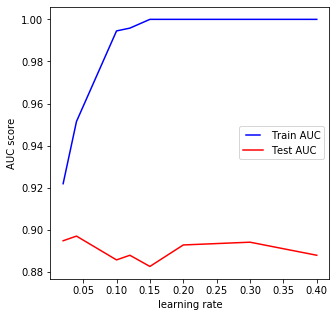

In [0]:
from sklearn.metrics import roc_curve, auc
learning_rates = [0.02, 0.04, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label= "Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

## Para este set de datos un ratio de aprendizaje = 0.11 es optimo

In [0]:
from sklearn.model_selection import cross_validate

#clf=RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")

output = cross_validate(gbc, X_test, y_test, cv=5, scoring = 'accuracy', return_estimator =True)

In [0]:
output['test_score'].mean()

0.8636203349985306

# Idea
## Añadir en un dataframe los resultados de las feture importances en sucesivas lineas con otra columna añadidas en la que se cuantifique el score alcanzado para despues analizar los scores máximos y las feature importances correspondientes.
### Hasta este punto cosigo listar las feature importantes de cada subset utlizado en la validación cruzad. Falta programa codigo que meta todo esto en un dataframe añadiendole simultaneamente una columna para el score.

In [0]:
#.sort_values('importance', ascending=False)

for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = df_bl.columns,
                                        columns=['importance'])
    #print(feature_importances)
    type(feature_importances)

Features sorted by their score for estimator 0:
Features sorted by their score for estimator 1:
Features sorted by their score for estimator 2:
Features sorted by their score for estimator 3:
Features sorted by their score for estimator 4:


In [0]:
scores.min()

0.7479674796747968

#1er intento de clasificar la base de datos Fermi 3FGL

In [0]:
# me aseguro que la columna correspondiente a su tipo bcu =2 ha sido eliminada

#print(X.shape, df_BCU.shape)


In [0]:
#df_BCU.head(5)

# Allá vamos , que Dios nos pille confesados!

In [0]:
#y_clasificados = gbc.predict(df_BCU_std)
#y_clasificados

In [0]:
#y_clasificados
#plt.rcParams['figure.figsize'] = (5,5)
#plt.hist(y_clasificados, bins=2)
#df_C= pd.DataFrame(data=y_clasificados.flatten())
#sns.pairplot(df_C)
#sns.countplot(data=df_C)
#p = sns.countplot(data=df_C)

In [0]:
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X_test, y_test, kn)

#from ipynb.fs.full.my_functions import Snippet_190
def Snippet_190(clf, X, y, cv):
    from sklearn.model_selection import train_test_split
    from matplotlib import pyplot
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.4)
    print(format('Hoe to visualise cross validation scores','*^82'))
    scores_train = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1_macro')
    scores_test = cross_val_score(clf, X_test, y_test, cv=cv, scoring='f1_macro')
    fig, ax = pyplot.subplots(figsize=(24,6))
    ax.set_ylim(0, 1.2)
    ax.plot(scores_train , label='Train')
    ax.plot(scores_test, label='Test')
    ax.legend()
    #pyplot.ylabel('Log Loss')
    #pyplot.title('XGBoost Log Loss')
    #pyplot.show()
    #plt.plot(scores_train,scores_test)
    print(np.mean(scores_test))
#Snippet_190(gbc, X_std, y_, 100)


## Con Suport Vector Machines (SVM)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.svm import SVC
#svm = SVC(probability=True)
#svm = SVC(kernel='rbf', gamma=10.0, C=1000.0, probability=True)
#svm.fit(X_train, y_train)

In [0]:
for C_exp in range(-2, 3):
    svm = SVC(kernel='linear', gamma=10.0, C=10**C_exp , probability=True)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    print(f'Score para C={10**C_exp:.5f}: {score:.3f}')
#for gamma_ in range(1,20):
#    svm = SVC(kernel='linear', gamma=gamma_, C=5)
#    svm.fit(X_train, y_train)
#    score = svm.score(X_test, y_test)
#    print(f'Score para Gamma={gamma_:.5f}: {score:.3f}')    

Score para C=0.01000: 0.900
Score para C=0.10000: 0.905
Score para C=1.00000: 0.908
Score para C=10.00000: 0.910
Score para C=100.00000: 0.905


In [0]:
  svm = SVC(kernel='linear', gamma=10.0, C=0.1 , probability=True)
  svm.fit(X_train, y_train)
  score = svm.score(X_test, y_test)

In [0]:
print(f'Score train: {svm.score(X_train, y_train)}')
print(f'Score test: {svm.score(X_test, y_test)}')

Score train: 0.8977272727272727
Score test: 0.9051094890510949


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:

confusion_matrix(y_test, svm.predict(X_test))
#X_test.values

array([[142,  19],
       [ 20, 230]])

In [0]:
#y_clasificados = svm.predict(df_BCU_std)
#y_clasificados



# Intento de eliminar recursivamente las caracteristicas para determinar el número optivmo de caracteristicas.

In [0]:
#from sklearn.feature_selection import RFECV
#from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
#from sklearn.ensemble import RandomForestClassifier #Random Forest

# The "accuracy" scoring is proportional to the number of correct classifications
#kfold = StratifiedKFold(n_splits=2, random_state=1) # k=10, split the data into 10 equal parts
#model_Linear_SVM=SVC(kernel='linear', gamma=10.0, C=0.1 , probability=True)
#rfecv = RFECV(estimator=model_Linear_SVM, step=1, cv=kfold,scoring='accuracy')   #5-fold cross-validation
#rfecv = rfecv.fit(X, y_)

#print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', X.columns[rfecv.support_])
#print('Original features :', X.columns)
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score \n of number of selected features")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

In [0]:
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X_test.values, y_test, svm)
#Snippet_190(svm, X_std, y_, 100)

## Con xgboost

In [0]:
#!pip install xgboost

In [0]:
from xgboost.plotting import plot_importance
import xgboost as xgb

In [0]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective ='binary:logistic',
             colsample_bytree = 0.3,
             learning_rate = 0.21,
             max_depth = 6, 
             alpha = 10,
             n_estimators = 1000,
             feature_names=caracteristicas_ )
#,
#            feature_names=caracteristicas_

In [0]:
%%timeit 
xg.fit(X_train,y_train)

1 loop, best of 3: 548 ms per loop


In [0]:
xg.score(X_test, y_test)

0.8807785888077859

In [0]:
confusion_matrix(y_test, xg.predict(X_test))

array([[139,  22],
       [ 27, 223]])

<Figure size 720x720 with 0 Axes>

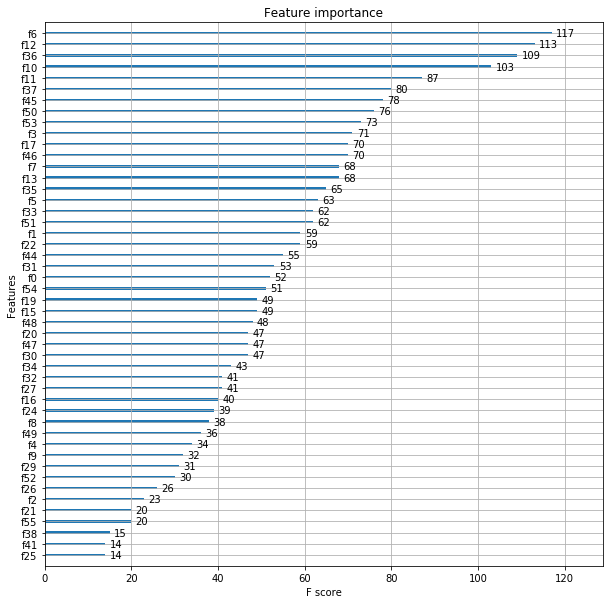

In [0]:
importances = xg.feature_importances_
#importances
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()
plot_importance(xg)

In [0]:
#Snippet_190(xg, X_std, y_, 100)

###Identificamos cada una de las features (feature importance) con su columna en el dataframe

In [0]:
cont=0
for feat, importance in zip(X.columns, xg.feature_importances_):
    cont=1+cont
    if importance >= 0:
        print(f' f({cont}) -> {feat} : {importance}')

 f(1) -> ra : 0.006872678641229868
 f(2) -> dec : 0.008603561669588089
 f(3) -> flux_1_100_gev : 0.03775693103671074
 f(4) -> spectral_index : 0.1569160372018814
 f(5) -> spectral_index_error : 0.016686752438545227
 f(6) -> detection_significance : 0.012631449848413467
 f(7) -> lii : 0.0054383594542741776
 f(8) -> bii : 0.011263882741332054
 f(9) -> pivot_energy : 0.01527139451354742
 f(10) -> flux_density : 0.006672102492302656
 f(11) -> flux_density_error : 0.041551172733306885
 f(12) -> energy_flux : 0.004367705434560776
 f(13) -> energy_flux_error : 0.004823710769414902
 f(14) -> curve_significance : 0.006063635461032391
 f(15) -> spectrum_type : 0.0
 f(16) -> powerlaw_index : 0.1751679927110672
 f(17) -> flux_100_300_mev : 0.009514221921563148
 f(18) -> flux_100_300_mev_pos_err : 0.013410803861916065
 f(19) -> flux_100_300_mev_neg_err : 0.0
 f(20) -> nufnu_100_300_mev : 0.0042267763055861
 f(21) -> sqrt_ts_100_300_mev : 0.0045580691657960415
 f(22) -> flux_0p3_1_gev : 0.0199316553

## Snipetts para calcular y mostrar las curvas de aprendizaje

In [0]:

#from ipynb.fs.full.my_functions import Snippet_188
#Snippet_188(X_std, y_)

In [0]:
#from ipynb.fs.full.my_functions import Snippet_189
#Snippet_189(X_std, y_)

## K Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
kn = KNeighborsClassifier(n_neighbors=3)

In [0]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
kn.score(X_test, y_test)


0.878345498783455

In [0]:
confusion_matrix(y_test, kn.predict(X_test))

array([[137,  24],
       [ 26, 224]])

In [0]:
#Snippet_190(kn, X_std, y_, 100)

## K Nearest Neighbors con datos normalizados

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
kn2 = KNeighborsClassifier(n_neighbors=2)
kn2.fit(X_train_std, y_train)
kn2.score(X_test_std, y_test)

0.8126520681265207

In [0]:
kn2.score(X_test_std, y_test)

0.8126520681265207

In [0]:
confusion_matrix(y_test, kn2.predict(X_test))

array([[146,  15],
       [ 60, 190]])

In [0]:
#plt.rcParams['figure.figsize'] = (10,10)
#plt.figure()
#plot_importance(xg)

In [0]:
#xg.feature_importances_

In [0]:
#for feat, importance in zip(X.columns, xg.feature_importances_):
#    if importance >0:
#        print(f'{feat}: {importance}')

In [0]:
#discriminantes=[6, 37, 13,15,8,34,7]
#X_train_std_2 = X_train_std[:, discriminantes]
#X_test_std_2 = X_test_std[:, discriminantes]

In [0]:
#kn_seleccion = KNeighborsClassifier(n_neighbors=2)
#kn_seleccion.fit(X_train_std_2, y_train)
#kn_seleccion.score(X_test_std_2, y_test)

## DECISION TREE

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
tree.score(X_test, y_test)

0.8287937743190662

In [0]:
tree.score(X_train, y_train)

0.935064935064935

In [0]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00681708, 0.        , 0.        , 0.06468223, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.68563702, 0.        , 0.        , 0.        , 0.        ,
       0.02245364, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03592716, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0178129 , 0.01483651, 0.        , 0.        ,
       0.        , 0.02450819, 0.        , 0.        , 0.03244128,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04734101, 0.        , 0.0056809 , 0.04186207, 0.        ,
       0.        ])

In [0]:
#cont=0
#for feat, importance in zip(X.columns, tree.feature_importances_):
#    cont=1+cont
#    if importance >= 0:
#        print(f' f({cont}) -> {feat} : {importance}')

In [0]:
#for feat, importance in zip(X.columns, tree.feature_importances_):
#    if importance >0:
#        print(f'{feat}: {importance}')

In [0]:
#Snippet_190(tree, X_std, y_, 100)

## Con Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
forest = RandomForestClassifier(criterion='gini',
 n_estimators=1000,
 n_jobs=2)


In [0]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
confusion_matrix(y_test, y_pred)
#X_test

0.8638132295719845


array([[ 81,  12],
       [ 23, 141]])

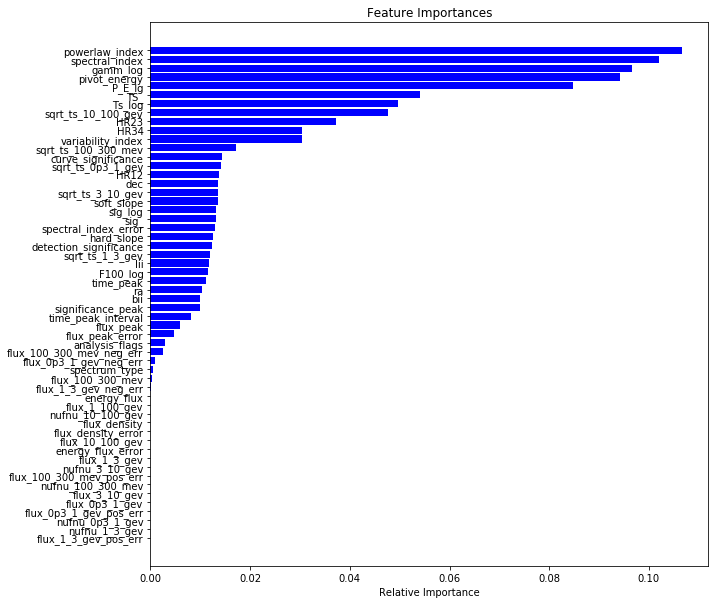

In [0]:
features = X.columns
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#X_test=X_test.values
#xg.feature_importances_

In [0]:
#Snippet_190(forest, X_std, y_, 100)

In [0]:
#f_names = xg.feature_names_
#df = df[f_names]
# AttributeError: 'numpy.ndarray' object has no attribute 'head'
#clf.predict_proba(X_test)
X_test.head(5)
type(X_test)
X_test=X_test.values

#Plots rendimiento comparado clasificadores

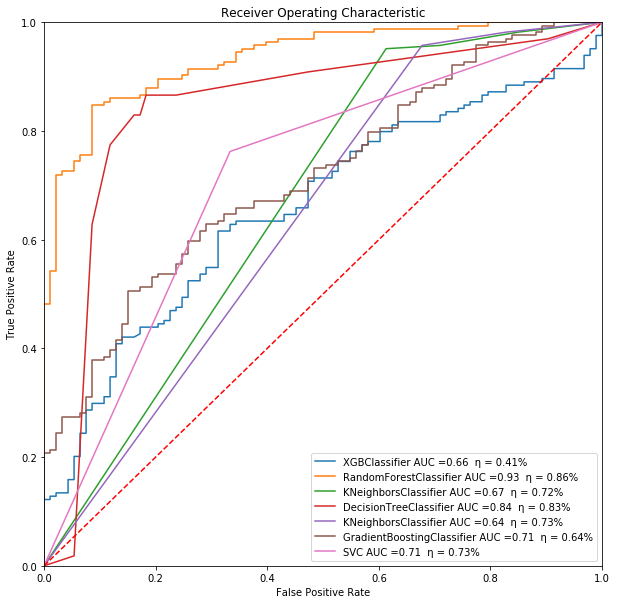

In [0]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
clasificadores =[xg,forest, kn, tree, kn2, gbc, svm]
#clasificadores =[xg, forest, kn, tree, kn2, gbc]
plt.title('Receiver Operating Characteristic')
for clf in clasificadores:
    # calculate the fpr and tpr for all thresholds of the classification
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc='%.2f' % roc_auc
    name =clf.__class__.__name__
    score_=clf.score(X_test, y_test)
    score_1='%.2f' % score_
    #print (score_1)
    # method I: plt
 

    
    plt.plot(fpr, tpr ,label = f'{name} AUC ={roc_auc}  η = {score_1}%')
    plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("/content/drive/My Drive/AUC_1.png")
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')